In [312]:
!pip install numpy
!pip install pandas
!pip install scipy

In [313]:
# read csv data 
import pandas as pd
import numpy as np
from scipy import linalg
movement = pd.read_csv('movement.csv')
station = pd.read_csv('stationary.csv')
movement

,MessageType,Seconds,Nanoseconds,r,theta,color,Latitude,Longitude,Orientation.x,Orientation.y,Orientation.z,Orientation.w,LinearAccel.x,LinearAccel.y,LinearAccel.z,Steering,LeftFrontSpeed,LeftBackSpeed,RightFrontSpeed,RightBackSpeed
0,Imu,13,424000000,NaN,NaN,NaN,NaN,NaN,-4.861444e-08,2.884101e-07,-4.452540e-12,1.000000,-0.069879,-0.013457,9.932187,NaN,NaN,NaN,NaN,NaN
1,Imu,13,425000000,NaN,NaN,NaN,NaN,NaN,-4.861442e-08,2.884102e-07,-4.396966e-12,1.000000,-0.039597,0.019242,9.863364,NaN,NaN,NaN,NaN,NaN
2,Imu,13,426000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.065065,0.005140,9.975646,NaN,NaN,NaN,NaN,NaN
3,WheelSpeeds,13,426000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,999.136963,0.220551,997.809326,-0.317707
4,Imu,13,427000000,NaN,NaN,NaN,NaN,NaN,-4.861441e-08,2.884101e-07,-4.397031e-12,1.000000,-0.068884,0.082392,9.652662,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42355,Imu,44,953000000,NaN,NaN,NaN,NaN,NaN,-6.785315e-07,4.741825e-07,7.962049e-01,-0.605027,-0.037107,-11.154437,9.696209,NaN,NaN,NaN,NaN,NaN
42356,Imu,44,954000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,7.966729e-01,-0.604411,-0.960968,-10.544933,10.048240,NaN,NaN,NaN,NaN,NaN
42357,Imu,44,955000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,7.969908e-01,-0.603991,-0.242611,-11.215021,9.679478,NaN,NaN,NaN,NaN,NaN
42358,Imu,44,956000000,NaN,NaN,NaN,NaN,NaN,-5.987453e-07,4.952731e-07,7.971563e-01,-0.603773,-1.231684,-10.596595,9.941318,NaN,NaN,NaN,NaN,NaN


In [394]:
imu_m = movement[movement['MessageType'] == 'Imu']
imu_s = station[station['MessageType'] == 'Imu']
gps_m = movement[movement['MessageType'] == 'GPS']
gps_s = station[station['MessageType'] == 'GPS']
wheel_m = movement[movement['MessageType'] == 'WheelSpeeds']
wheel_s = station[station['MessageType'] == 'WheelSpeeds']
or_m = imu_m[["Orientation.x", "Orientation.y", "Orientation.z", "Orientation.w", "Seconds", "Nanoseconds"]]
or_s = imu_s[["Orientation.x", "Orientation.y", "Orientation.z", "Orientation.w", "Seconds", "Nanoseconds"]]
gs_m = gps_m[["Latitude", "Longitude", "Seconds", "Nanoseconds"]]
gs_s = gps_s[["Latitude", "Longitude"]]
w_m = wheel_m[["LeftFrontSpeed", "LeftBackSpeed", "RightFrontSpeed", "RightBackSpeed", "Seconds", "Nanoseconds"]]
w_s = wheel_s[["LeftFrontSpeed", "LeftBackSpeed", "RightFrontSpeed", "RightBackSpeed", "Seconds", "Nanoseconds"]]

In [411]:


# Convert a quaternion to Euler angles (yaw, pitch, roll)
def quaternion_to_euler(x, y, z, w):
    # Element-wise operations for arrays
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = np.degrees(np.arctan2(t0, t1))  n
    t2 = +2.0 * (w * y - z * x)
    t2 = np.clip(t2, -1.0, 1.0)  # Clip to avoid domain errors
    Y = np.degrees(np.arcsin(t2))  # Pitch

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = np.degrees(np.arctan2(t3, t4))  # Yaw

    return X, Y, Z


orientation_x = np.array([0.1, 0.2, 0.3])
orientation_y = np.array([0.1, 0.2, 0.3])
orientation_z = np.array([0.1, 0.2, 0.3])
orientation_w = np.array([1.0, 0.9, 0.8])

nroll, pitch, yaw = quaternion_to_euler(orientation_x, orientation_y, orientation_z, orientation_w)

print("Roll:", roll)
print("Pitch:", pitch)
print("Yaw:", yaw)


Roll: [12.90740867 27.64597536 45.881404  ]
Pitch: [10.36975981 16.26020471 17.45760312]
Yaw: [12.90740867 27.64597536 45.881404  ]


In [412]:
accel_x_data = movement['LinearAccel.x'].dropna().values
accel_y_data = movement['LinearAccel.y'].dropna().values
time = or_m['Seconds'].values
Nano = or_m['Nanoseconds'].values


def quaternion_to_euler(x,y,z,w):
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = np.degrees(np.arctan2(t0, t1))

    t2 = +2.0 * (w * y - z * x)
    # t2 = +1.0 if t2 > +1.0 else t2
    # t2 = -1.0 if t2 < -1.0 else t2
    t2 = np.clip(t2, -1.0, 1.0)
    Y = np.degrees(np.arcsin(t2))

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = np.degrees(np.arctan2(t3, t4))

    return X, Y, Z

full_time = time + Nano * 1e-9

def calculate_position_with_orientation(accel_x, accel_y, time, yaw):
    velocity_x, velocity_y = 0, 0
    position_x, position_y = 0, 0
    
    positions_x = [position_x]
    positions_y = [position_y]
    
    # Loop through the data
    for i in range(1, len(time)):
        dt = full_time[i] - full_time[i-1]
        
        # Rotate the acceleration based on the current yaw angle
        accel_x_rot = accel_x[i] * np.cos(np.radians(yaw[i])) - accel_y[i] * np.sin(np.radians(yaw[i]))
        accel_y_rot = accel_x[i] * np.sin(np.radians(yaw[i])) + accel_y[i] * np.cos(np.radians(yaw[i]))
        
        # Update velocity based on rotated acceleration
        velocity_x += accel_x_rot * dt
        velocity_y += accel_y_rot * dt
        
        # Update position based on velocity
        position_x += velocity_x * dt
        position_y += velocity_y * dt
        
        positions_x.append(position_x)
        positions_y.append(position_y)
    
    return np.array(positions_x), np.array(positions_y)

# Calculate yaw from quaternion
orientation_x = or_m['Orientation.x'].values
orientation_y = or_m['Orientation.y'].values
orientation_z = or_m['Orientation.z'].values
orientation_w = or_m['Orientation.w'].values

# Convert quaternion to yaw (rotation around z-axis)
roll, pitch, yaw = quaternion_to_euler(orientation_x, orientation_y, orientation_z, orientation_w)
# Ensure all arrays have the same length
min_length = min(len(accel_x_data), len(accel_y_data), len(time), len(yaw))

naccel_x_data = accel_x_data[:min_length]
accel_y_data = accel_y_data[:min_length]
time = time[:min_length]
yaw = yaw[:min_length]

positions_x, positions_y = calculate_position_with_orientation(accel_x_data, accel_y_data, time, yaw)

print(positions_x, positions_y)


[ 0.00000000e+00 -3.95971460e-08 -1.41288688e-08 ...  2.91753399e+01
  2.91720058e+01  2.91686619e+01] [ 0.00000000e+00  1.92421627e-08  4.36246610e-08 ... -1.04589569e+01
 -1.04681959e+01 -1.04774309e+01]


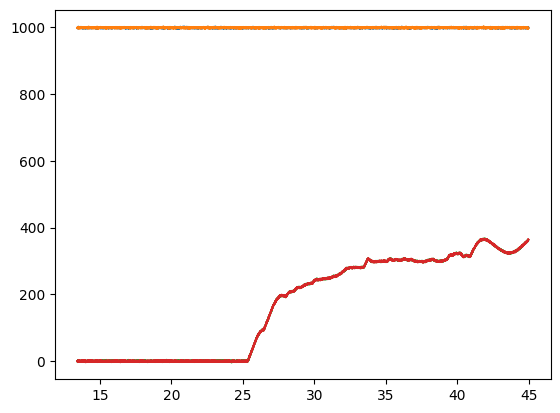

In [413]:
#graph wheel speeds over time 
#front wheels do not work
leftFront, rightFront, leftBack, rightBack = w_m['LeftFrontSpeed'].values, w_m['RightFrontSpeed'].values, w_m['LeftBackSpeed'].values, w_m['RightBackSpeed'].values
time_w = w_m['Seconds'].values
nano_w = w_m['Nanoseconds'].values
full_time_w = time_w + nano_w * 1e-9
plt.plot(full_time_w, leftFront, label='Left Front')
plt.plot(full_time_w, rightFront, label='Right Front')
plt.plot(full_time_w, leftBack, label='Left Back')
plt.plot(full_time_w, rightBack, label='Right Back')

In [414]:
#calculate position with wheel speed


leftBack, rightBack = w_m['LeftBackSpeed'].values, w_m['RightBackSpeed'].values
time_w = w_m['Seconds'].values
nano_w = w_m['Nanoseconds'].values
wheel_r = 0.2525

full_time_w = time_w + nano_w * 1e-9

def find_common_elements(large_list, small_list):
    small_set = set(small_list)  
    common_elements = list(small_set.intersection(large_list))  
    
    return common_elements


common_elements = find_common_elements(full_time, full_time_w)

matched_indices = [i for i, t in enumerate(full_time) if t in common_elements]
matched_wheel_indices = [i for i, t in enumerate(full_time_w) if t in common_elements]
print(len(matched_indices), len(orientation_w))
orientation_x_matched = orientation_x[matched_indices]
orientation_y_matched = orientation_y[matched_indices]
orientation_z_matched = orientation_z[matched_indices]
orientation_w_matched = orientation_w[matched_indices]
rightBack_w = rightBack[matched_wheel_indices]
leftBack_w = leftBack[matched_wheel_indices]
full_time_w_a = full_time_w[matched_wheel_indices]
# match yaw
roll_w, pitch_w, yaw_w = quaternion_to_euler(orientation_x_matched, orientation_y_matched, orientation_z_matched, orientation_w_matched)





def rpm_to_meters_per_second(rpm, radius):
    return rpm * np.pi * radius / 60


def calculate_position_with_wheel(leftBack, rightBack, time_w, yaw_w):
    position_x, position_y = 0, 0

    # Store positions
    positions_w_x = [position_x]
    positions_w_y = [position_y]

    for i in range(1, len(time_w)):
        dt = time_w[i] - time_w[i-1]
        
        # Calculate wheel velocities in m/s
        v_left_back = rpm_to_meters_per_second(leftBack[i], wheel_r)
        v_right_back = rpm_to_meters_per_second(rightBack[i], wheel_r)

        v_car = (v_left_back + v_right_back) / 2


        dx = v_car * dt * np.array([np.cos(np.radians(yaw_w[i])), np.sin(np.radians(yaw_w[i]))])
        position_x += dx[0]
        position_y += dx[1]

        #Update positions using the car's velocity and heading
        position_x += v_car * np.cos(np.radians(yaw_w[i])) * dt
        position_y += v_car * np.sin(np.radians(yaw_w[i])) * dt

        # Store new positions
        positions_w_x.append(position_x)
        positions_w_y.append(position_y)

    return np.array(positions_w_x), np.array(positions_w_y)


positions_w_x, positions_w_y = calculate_position_with_wheel(leftBack_w, rightBack_w, full_time_w_a, yaw_w)

nprint(positions_w_x, positions_w_y)

5326 26734
[ 0.00000000e+00 -3.60244255e-05  1.40256972e-05 ...  3.24464173e+01
  3.24209298e+01  3.24079198e+01] [ 0.00000000e+00  3.17809255e-16 -1.29307897e-16 ... -7.30365833e+00
 -7.39606594e+00 -7.44229208e+00]


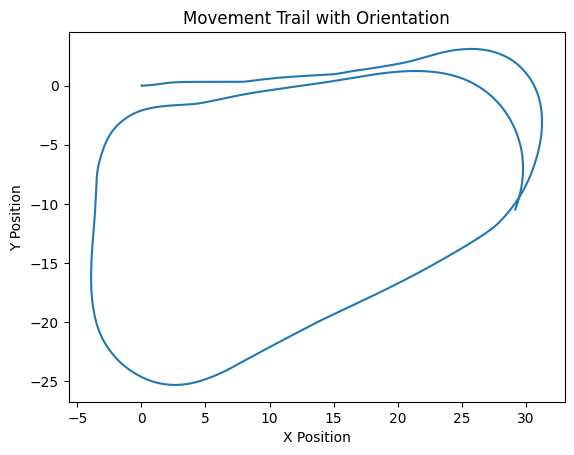

In [415]:

import matplotlib.pyplot as plt

plt.plot(positions_x, positions_y)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Movement Trail with Orientation')
plt.show()

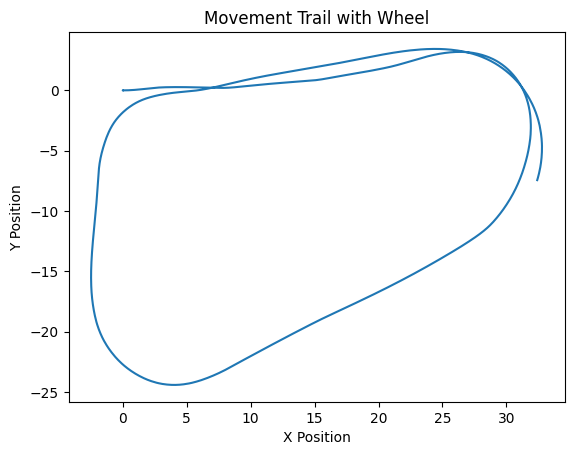

In [416]:
#wheel graph


plt.plot(positions_w_x, positions_w_y)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Movement Trail with Wheel')
plt.show()

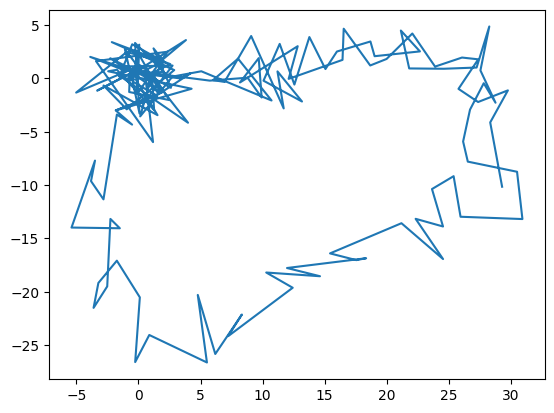

In [417]:
#GPS data
def long_lat_to_x_y(lon, lat, R=6378137):
    g_x = []
    g_y = []
    for i in range(len(lon)):
        x = R * (np.radians(lon[i] - lon[0]))
        y = R * (np.radians(lat[i] - lat[0]))
        x = x / 2

        g_x.append(x)
        g_y.append(y)

    return np.array(g_x), np.array(g_y)

full_time_gps = gs_m['Seconds'].values + gs_m['Nanoseconds'].values * 1e-9
gps_x, gps_y = long_lat_to_x_y(gs_m['Longitude'].values, gs_m['Latitude'].values)
matched_indices_gps = [i for i, t in enumerate(full_time) if t in full_time_gps]
plt.plot(gps_x, gps_y)
plt.show()

In [320]:
accel_x_data = station['LinearAccel.x'].dropna().values
accel_y_data = station['LinearAccel.y'].dropna().values
time_s = or_s['Seconds'].values
Nano_s = or_s['Nanoseconds'].values

full_time_s = time_s + Nano_s * 1e-9
orientation_x_s = or_s['Orientation.x'].values
orientation_y_s = or_s['Orientation.y'].values
orientation_z_s = or_s['Orientation.z'].values
orientation_w_s = or_s['Orientation.w'].values
roll_s, pitch_s, yaw_s = quaternion_to_euler(orientation_x_s, orientation_y_s, orientation_z_s, orientation_w_s)
positions_s_x, positions_s_y = calculate_position_with_orientation(accel_x_data, accel_y_data, full_time_s, yaw_s)

print(positions_s_x, positions_s_y)


[ 0.00000000e+00 -1.60805878e-07 -3.15660593e-07 ...  6.57869155e-03
  6.57810689e-03  6.57754308e-03] [ 0.00000000e+00 -6.47804669e-09 -6.27719600e-08 ... -4.65929636e-02
 -4.66048716e-02 -4.66167007e-02]


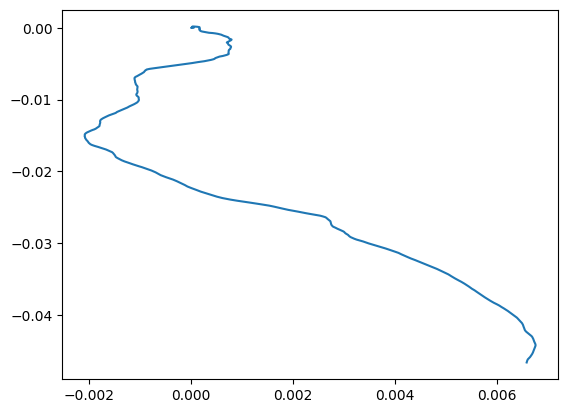

In [321]:
plt.plot(positions_s_x, positions_s_y)

In [322]:
#calculate position with wheel speed, stationary


leftBack_s, rightBack_s = w_s['LeftBackSpeed'].values, w_s['RightBackSpeed'].values
time_w_s = w_s['Seconds'].values
nano_w_s = w_s['Nanoseconds'].values

full_time_w_s = time_w_s + nano_w_s * 1e-9


common_elements_s = find_common_elements(full_time_s, full_time_w_s)
matched_indices_s = [i for i, t in enumerate(full_time_s) if t in common_elements_s]
matched_wheel_indices_s = [i for i, t in enumerate(full_time_w_s) if t in common_elements_s]
orientation_x_matched_s = orientation_x_s[matched_indices_s]
orientation_y_matched_s = orientation_y_s[matched_indices_s]
orientation_z_matched_s = orientation_z_s[matched_indices_s]
orientation_w_matched_s = orientation_w_s[matched_indices_s]
rightBack_w_s = rightBack_s[matched_wheel_indices_s]
leftBack_w_s = leftBack_s[matched_wheel_indices_s]
full_time_w_a_s = full_time_w_s[matched_wheel_indices_s]
# match yaw
roll_w_s, pitch_w_s, yaw_w_s = quaternion_to_euler(orientation_x_matched_s, orientation_y_matched_s, orientation_z_matched_s, orientation_w_matched_s)




positions_w_s_x, positions_w_s_y = calculate_position_with_wheel(leftBack_w_s, rightBack_w_s, full_time_w_a_s, yaw_w_s)

nprint(positions_w_s_x, positions_w_s_y)

[ 0.         -0.00014723 -0.00018141 ... -0.00729159 -0.00732349
 -0.00747852] [0.00000000e+00 1.32170633e-15 1.32170633e-15 ... 4.99544841e-14
 4.99544841e-14 4.99544841e-14]


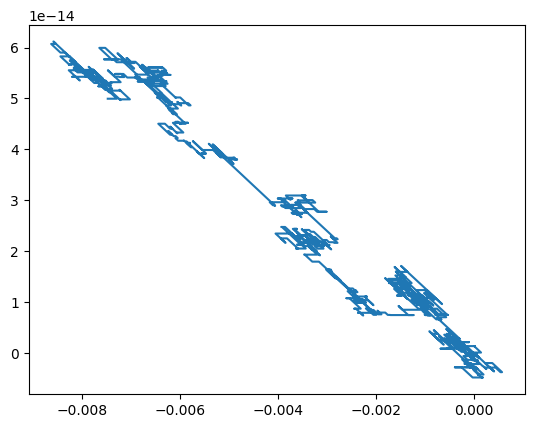

In [323]:
plt.plot(positions_w_s_x, positions_w_s_y)

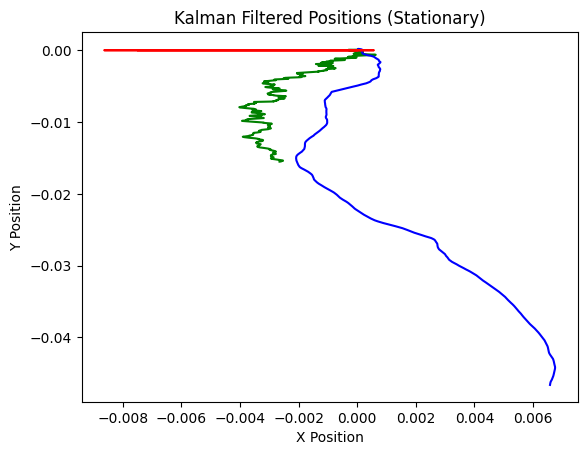

In [428]:
#Define Kalman Filter class
class KF2D:
    def __init__(self, initial_x: float, initial_y: float, initial_vx: float, initial_vy: float, accel_variance: float) -> None:
        self.x = np.array([initial_x, initial_y, initial_vx, initial_vy])  
        self.accel_variance = accel_variance
        self._P = np.eye(4)  
    
    def predict(self, dt: float) -> None:
        # State transition matrix F
        F = np.array([[1, 0, dt, 0],
                      [0, 1, 0, dt],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])

    
        G = np.array([[0.5 * dt**2, 0, dt, 0],
                      [0, 0.5 * dt**2, 0, dt],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])

       
        self.x = F.dot(self.x)
        

        self._P = F.dot(self._P).dot(F.T) + G.dot(G.T) * self.accel_variance
    
    def update(self, meas_x: float, meas_y: float, meas_variance: float) -> None:
        # Observation matrix H
        H = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0]])

        # Measurement vector z
        z = np.array([meas_x, meas_y])

        # Measurement covariance R
        R = np.array([[meas_variance, 0],
                      [0, meas_variance]])


        y = z - H.dot(self.x)
        
        S = H.dot(self._P).dot(H.T) + R
        
        K = self._P.dot(H.T).dot(linalg.inv(S))


        self.x = self.x + K.dot(y)
        

        self._P = (np.eye(4) - K.dot(H)).dot(self._P)
    
    @property
    def cov(self) -> np.array:
        return self._P
    
    @property
    def mean(self) -> np.array:
        return self.x
    
    @property
    def pos_x(self):
        return self.x[0]
    
    @property
    def pos_y(self):
        return self.x[1]

    @property
    def vel_x(self):
        return self.x[2]

    @property
    def vel_y(self):
        return self.x[3]

# Initialize Kalman filter
kf2d = KF2D(initial_x=0, initial_y=0, initial_vx=0, initial_vy=0, accel_variance=1.0)

# Define measurement variance for IMU and wheel data
meas_variance_imu = 0.1  # Tune this value the way you want, lower it is the better in this casenmeas_variance_wheel = 0.05  # Tune this value based on the confidence in wheel data

filtered_positions_x = []
filtered_positions_y = []


for i in range(len(matched_indices_s)):
    dt = full_time_s[matched_indices_s[i]] - full_time_s[matched_indices_s[i-1]] if i > 0 else 0.01  
    
    # Kalman filter prediction step
    kf2d.predict(dt)

    # Get measurements from both IMU and wheel data
    meas_imu_x = positions_s_x[matched_indices_s[i]]
    meas_imu_y = positions_s_y[matched_indices_s[i]]
    
    meas_wheel_x = positions_w_s_x[i]
    meas_wheel_y = positions_w_s_y[i]
    kf2d.update(meas_x=meas_imu_x, meas_y=meas_imu_y, meas_variance=meas_variance_imu)

    kf2d.update(meas_x=meas_wheel_x, meas_y=meas_wheel_y, meas_variance=meas_variance_wheel)

    # Store filtered positions
    filtered_positions_x.append(kf2d.pos_x)
    filtered_positions_y.append(kf2d.pos_y)

# Convert to arrays for plotting
filtered_positions_x = np.array(filtered_positions_x)
filtered_positions_y = np.array(filtered_positions_y)

plt.plot(filtered_positions_x, filtered_positions_y, label='Filtered Positions (IMU + Wheel)', color='green')
plt.plot(positions_s_x, positions_s_y, label='IMU Positions', color='blue')
plt.plot(positions_w_s_x, positions_w_s_y, label='Wheel Positions', color='red')
plt.title('Kalman Filtered Positions (Stationary)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()





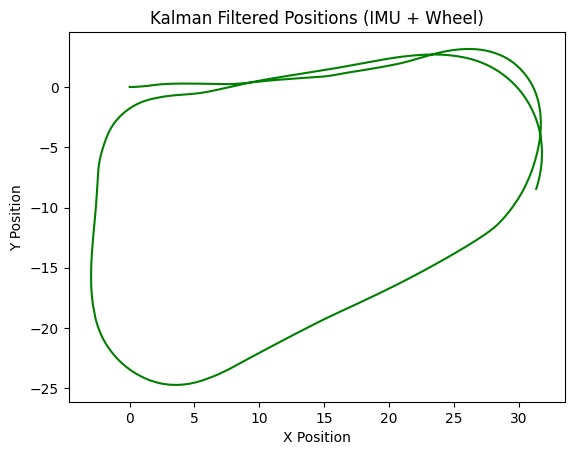

In [389]:
kf2d = KF2D(initial_x=0, initial_y=0, initial_vx=0, initial_vy=0, accel_variance=1.0)

meas_variance_imu = 0.1  
meas_variance_wheel = 0.05  

filtered_positions_x = []
filtered_positions_y = []


for i in range(len(matched_indices)):
    dt = full_time[matched_indices[i]] - full_time[matched_indices[i-1]] if i > 0 else 0.01  


    kf2d.predict(dt)


    meas_imu_x = positions_x[matched_indices[i]]
    meas_imu_y = positions_y[matched_indices[i]]

 
    meas_wheel_x = positions_w_x[i]
    meas_wheel_y = positions_w_y[i]

    kf2d.update(meas_x=meas_imu_x, meas_y=meas_imu_y, meas_variance=meas_variance_imu)


    kf2d.update(meas_x=meas_wheel_x, meas_y=meas_wheel_y, meas_variance=meas_variance_wheel)


    filtered_positions_x.append(kf2d.pos_x)
    filtered_positions_y.append(kf2d.pos_y)


filtered_positions_x = np.array(filtered_positions_x)
filtered_positions_y = np.array(filtered_positions_y)

plt.plot(filtered_positions_x, filtered_positions_y, label='Filtered Positions (IMU + Wheel)', color='green')
# plt.plot(positions_x, positions_y, label='IMU Positions', color='blue')
# plt.plot(positions_w_x, positions_w_y, label='Wheel Positions', color='red')
plt.title('Kalman Filtered Positions (IMU + Wheel)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()


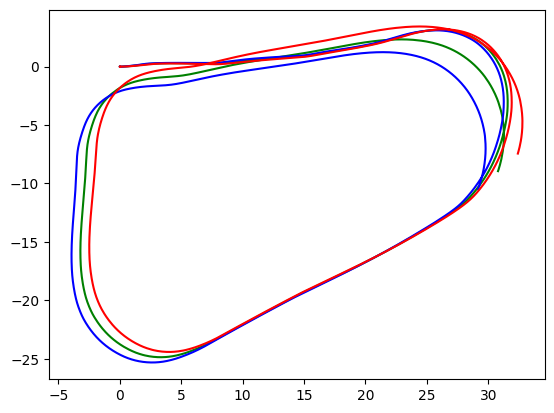

In [406]:
kf2d = KF2D(initial_x=0, initial_y=0, initial_vx=0, initial_vy=0, accel_variance=1.0)

filtered_positions_x = []
filtered_positions_y = []

last_wheel_x = None
last_wheel_y = None
last_wheel_time = None

wheel_time = full_time[matched_indices]  #

for i in range(len(full_time)):
    meas_imu_x = positions_x[i]
    meas_imu_y = positions_y[i]

    dt = full_time[i] - full_time[i-1] if i > 0 else 0.01

    kf2d.predict(dt)

    # Always update with IMU data
    kf2d.update(meas_x=meas_imu_x, meas_y=meas_imu_y, meas_variance=meas_variance_imu)

    # Check if wheel data is available (wheel data is less frequent)
    if i in matched_indices:
        # Update with wheel data if available
        wheel_idx = matched_indices.index(i)

        meas_wheel_x = positions_w_x[wheel_idx]
        meas_wheel_y = positions_w_y[wheel_idx]
        last_wheel_x = meas_wheel_x
        last_wheel_y = meas_wheel_y
        last_wheel_time = full_time[i]


    if last_wheel_x is not None:
 
        dt_wheel = full_time[i] - last_wheel_time


        combined_variance_x = 1 / (1/meas_variance_imu + 1/meas_variance_wheel)
        combined_variance_y = 1 / (1/meas_variance_imu + 1/meas_variance_wheel)

        fused_x = (meas_imu_x / meas_variance_imu + last_wheel_x / meas_variance_wheel) * combined_variance_x
        fused_y = (meas_imu_y / meas_variance_imu + last_wheel_y / meas_variance_wheel) * combined_variance_y

        kf2d.update(meas_x=fused_x, meas_y=fused_y, meas_variance=combined_variance_x)

    filtered_positions_x.append(kf2d.pos_x)
    filtered_positions_y.append(kf2d.pos_y)

# Convert lists to arrays
filtered_positions_x = np.array(filtered_positions_x)
filtered_positions_y = np.array(filtered_positions_y)


plt.plot(filtered_positions_x, filtered_positions_y, label='Filtered Positions (IMU + Wheel)', color='green')
plt.plot(positions_x, positions_y, label='IMU Positions', color='blue')
plt.plot(positions_w_x, positions_w_y, label='Wheel Positions', color='red')
plt.show()


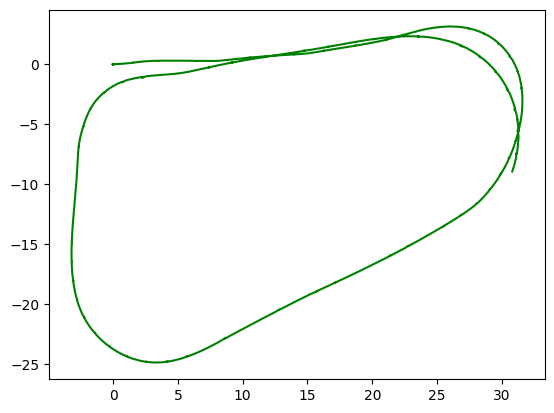

In [424]:
kf2d = KF2D(initial_x=0, initial_y=0, initial_vx=0, initial_vy=0, accel_variance=1.0)
meas_variance_gps = 0.4
filtered_positions_x = []
filtered_positions_y = []

last_wheel_x = None
last_wheel_y = None
last_wheel_time = None

# Create arrays for GPS data

for i in range(len(full_time)):
    meas_imu_x = positions_x[i]
    meas_imu_y = positions_y[i]

    dt = full_time[i] - full_time[i-1] if i > 0 else 0.01

    kf2d.predict(dt)

    # Always update with IMU data
    kf2d.update(meas_x=meas_imu_x, meas_y=meas_imu_y, meas_variance=meas_variance_imu)

    # Check if wheel data is available (wheel data is less frequent)
    if i in matched_indices:
        # Get the corresponding wheel data index
        wheel_idx = matched_indices.index(i)

        meas_wheel_x = positions_w_x[wheel_idx]
        meas_wheel_y = positions_w_y[wheel_idx]
        last_wheel_x = meas_wheel_x
        last_wheel_y = meas_wheel_y
        last_wheel_time = full_time[i]

    # Combine IMU and wheel data if the wheel data is available
    if last_wheel_x is not None:
        combined_variance_x = 1 / (1/meas_variance_imu + 1/meas_variance_wheel)
        combined_variance_y = 1 / (1/meas_variance_imu + 1/meas_variance_wheel)

        fused_x = (meas_imu_x / meas_variance_imu + last_wheel_x / meas_variance_wheel) * combined_variance_x
        fused_y = (meas_imu_y / meas_variance_imu + last_wheel_y / meas_variance_wheel) * combined_variance_y

        kf2d.update(meas_x=fused_x, meas_y=fused_y, meas_variance=combined_variance_x)

    # Check if GPS data is available
    if i in matched_indices_gps:
        gps_idx = matched_indices_gps.index(i)
        gps_position_x = gps_x[gps_idx]
        gps_position_y = gps_y[gps_idx]

        # Use GPS to correct the Kalman filter
        kf2d.update(meas_x=gps_position_x, meas_y=gps_position_y, meas_variance=meas_variance_gps)

    filtered_positions_x.append(kf2d.pos_x)
    filtered_positions_y.append(kf2d.pos_y)

# Convert lists to arrays
filtered_positions_x = np.array(filtered_positions_x)
filtered_positions_y = np.array(filtered_positions_y)

# Plot the results
plt.plot(filtered_positions_x, filtered_positions_y, label='Filtered Positions (IMU + Wheel + GPS)', color='green')
# plt.plot(gps_x, gps_y, label='GPS Data', color='blue') 
# plt.plot(positions_w_x, positions_w_y, label='Wheel Positions', color='blue')
# plt.plot(positions_x, positions_y, label='IMU Positions', color='red')

plt.show()


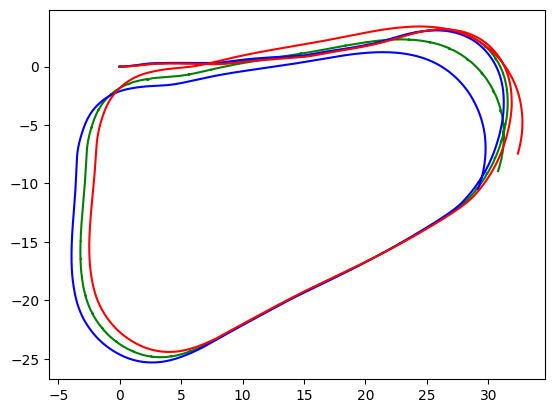

In [427]:
kf2d = KF2D(initial_x=0, initial_y=0, initial_vx=0, initial_vy=0, accel_variance=1.0)
meas_variance_gps = 0.4
filtered_positions_x = []
filtered_positions_y = []

last_wheel_x = None
last_wheel_y = None
last_wheel_time = None

for i in range(len(full_time)):
    meas_imu_x = positions_x[i]
    meas_imu_y = positions_y[i]

    dt = full_time[i] - full_time[i-1] if i > 0 else 0.01

    kf2d.predict(dt)

    # Always update with IMU data
    kf2d.update(meas_x=meas_imu_x, meas_y=meas_imu_y, meas_variance=meas_variance_imu)

    # Check if wheel data is available
    if i in matched_indices:
        wheel_idx = matched_indices.index(i)
        meas_wheel_x = positions_w_x[wheel_idx]
        meas_wheel_y = positions_w_y[wheel_idx]
        last_wheel_x = meas_wheel_x
        last_wheel_y = meas_wheel_y

    # Combine IMU and wheel data if the wheel data is available
    if last_wheel_x is not None:
        combined_variance_x = 1 / (1/meas_variance_imu + 1/meas_variance_wheel)
        combined_variance_y = 1 / (1/meas_variance_imu + 1/meas_variance_wheel)

        fused_x = (meas_imu_x / meas_variance_imu + last_wheel_x / meas_variance_wheel) * combined_variance_x
        fused_y = (meas_imu_y / meas_variance_imu + last_wheel_y / meas_variance_wheel) * combined_variance_y

        # Update with fused measurements from IMU and wheel data
        kf2d.update(meas_x=fused_x, meas_y=fused_y, meas_variance=combined_variance_x)

    # Check if GPS data is available
    if i in matched_indices_gps:
        gps_idx = matched_indices_gps.index(i)
        gps_position_x = gps_x[gps_idx]
        gps_position_y = gps_y[gps_idx]

        # Combine GPS with current estimates
        combined_variance_x = 1 / (1/meas_variance_imu + 1/meas_variance_gps)
        combined_variance_y = 1 / (1/meas_variance_imu + 1/meas_variance_gps)

        fused_x = (kf2d.pos_x / meas_variance_imu + gps_position_x / meas_variance_gps) * combined_variance_x
        fused_y = (kf2d.pos_y / meas_variance_imu + gps_position_y / meas_variance_gps) * combined_variance_y

        # Update with fused measurements from GPS
        kf2d.update(meas_x=fused_x, meas_y=fused_y, meas_variance=combined_variance_x)

    filtered_positions_x.append(kf2d.pos_x)
    filtered_positions_y.append(kf2d.pos_y)

# Convert lists to arrays
filtered_positions_x = np.array(filtered_positions_x)
filtered_positions_y = np.array(filtered_positions_y)

# Plot the results
plt.plot(filtered_positions_x, filtered_positions_y, label='Filtered Positions (IMU + Wheel + GPS)', color='green')
plt.plot(positions_x, positions_y, label='IMU Positions', color='blue')
plt.plot(positions_w_x, positions_w_y, label='Wheel Positions', color='red')
plt.show()


In [ ]:
# for presentation
#inital options and Rationale
#show graphs( so like things that got me to get my filter done)
# put summary pros and cons

#race car will og in a line, starts off at 0,0 goes around track clockwise, goes on same line, slowed down so it went insisde graph
# turns they can go on high side but then slow down next time